<a href="https://colab.research.google.com/github/Ayasa18/ProgresBelajar/blob/main/Submission_Akhir_KlasifikasiGambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** [Aditiya Saputra]
- **Email:** [AditiyaS1811@gmail.com]
- **ID Dicoding:** [aditiya18]

## Import Semua Packages/Library yang Digunakan

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Data Preparation

### Data Loading

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d muratkokludataset/rice-image-dataset/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/versions/
License(s): CC0-1.0
rice-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# Read Dataset

In [3]:
with zipfile.ZipFile('rice-image-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('rice-image-dataset')

def print_images_resolution(directory):
    """
    Mencetak jumlah gambar di setiap subdirektori dan resolusi unik setiap gambar.
    Args:
        directory (str): Path folder dataset.
    """
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue  # Skip jika bukan direktori

        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images} images")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except Exception as e:
                print(f"Error opening image {img_file}: {e}")

        print("Unique resolutions:")
        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")
        unique_sizes.clear()  # Reset untuk subdir berikutnya

    print(f"\nTotal images: {total_images}")

dataset_folder = "/content/rice-image-dataset/Rice_Image_Dataset"
print_images_resolution(dataset_folder)

Karacadag: 15000 images
Unique resolutions:
- (250, 250)
---------------
Basmati: 15000 images
Unique resolutions:
- (250, 250)
---------------
train: 5 images
Error opening image Karacadag: [Errno 21] Is a directory: '/content/rice-image-dataset/Rice_Image_Dataset/train/Karacadag'
Error opening image Basmati: [Errno 21] Is a directory: '/content/rice-image-dataset/Rice_Image_Dataset/train/Basmati'
Error opening image Ipsala: [Errno 21] Is a directory: '/content/rice-image-dataset/Rice_Image_Dataset/train/Ipsala'
Error opening image Jasmine: [Errno 21] Is a directory: '/content/rice-image-dataset/Rice_Image_Dataset/train/Jasmine'
Error opening image Arborio: [Errno 21] Is a directory: '/content/rice-image-dataset/Rice_Image_Dataset/train/Arborio'
Unique resolutions:
---------------
test: 5 images
Error opening image Karacadag: [Errno 21] Is a directory: '/content/rice-image-dataset/Rice_Image_Dataset/test/Karacadag'
Error opening image Basmati: [Errno 21] Is a directory: '/content/rice

### Data Preprocessing

#### Split Dataset

In [4]:

# Direktori dataset
dataset_dir = "/content/rice-image-dataset/Rice_Image_Dataset"

# List tiap class
classes = ["Karacadag", "Basmati", "Ipsala", "Jasmine", "Arborio"]

# Rasio train dan test sets
train_ratio = 0.8

# Loop untuk setiap class
for class_name in classes:
    # Path ke direktori class saat ini
    class_dir = os.path.join(dataset_dir, class_name)

    # List semua file dalam direktori class
    files = os.listdir(class_dir)

    # Split files menjadi train (80%) dan test (20%)
    train_files, test_files = train_test_split(files, train_size=train_ratio, random_state=42)

    # Membuat direktori baru untuk train dan test sets
    for folder_name, file_list in [("train", train_files), ("test", test_files)]:
        folder_path = os.path.join(dataset_dir, folder_name, class_name)
        os.makedirs(folder_path, exist_ok=True)

        # Memindahkan file ke direktori yang sesuai
        for file in file_list:
            src = os.path.join(class_dir, file)
            dst = os.path.join(folder_path, file)
            shutil.move(src, dst)

print("Dataset berhasil dibagi menjadi 80% train dan 20% test.")


Dataset berhasil dibagi menjadi 80% train dan 20% test.


# Data Normalisasi dan Augmentasi

In [5]:
# Dimensi sebuah gambar
img_width, img_height = 256, 256

# Ukuran batch image
batch_size = 64
# Data augmentation dan normalisasi untuk train dan test
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255  # Normalize pixel values to [0,1]
)

# Data generators
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  #
)

print(f"Train samples: {train_generator.samples}")
print(f"Test samples: {test_generator.samples}")


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Train samples: 60000
Test samples: 15000


## Modelling

In [6]:
num_classes = len(["Karacadag", "Basmati", "Ipsala", "Jasmine", "Arborio"])

# Membuat model Sequential
model = Sequential()

# Layer Convolutional pertama dengan MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer Convolutional kedua dengan MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer Convolutional ketiga dengan MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer untuk mengubah data ke dimensi 1D
model.add(Flatten())

# Fully connected layer (Dense) dengan dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer dengan softmax
model.add(Dense(num_classes, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Menampilkan arsitektur model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,621 (56.61 MB)

 Trainable params: 14,839,621 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
class CustomStopCallback(Callback):
    def __init__(self, threshold=0.98):
        super(CustomStopCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        if train_acc > self.threshold and val_acc > self.threshold:
            print(f"\nAkurasi sudah mencapai {self.threshold * 100:.2f}%! Menghentikan pelatihan.")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    min_delta=0.01,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

custom_stop_callback = CustomStopCallback(threshold=0.98)

# Latih Model dengan Callbacks
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping, model_checkpoint, custom_stop_callback]
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9722 - loss: 0.0862
Epoch 1: val_accuracy improved from -inf to 0.99027, saving model to best_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 213s 226ms/step - accuracy: 0.9722 - loss: 0.0862 - val_accuracy: 0.9903 - val_loss: 0.0299
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.9849 - loss: 0.0487
Epoch 2: val_accuracy improved from 0.99027 to 0.99087, saving model to best_model.keras

Akurasi sudah mencapai 98.00%! Menghentikan pelatihan.
938/938 ━━━━━━━━━━━━━━━━━━━━ 275s 240ms/step - accuracy: 0.9849 - loss: 0.0487 - val_accuracy: 0.9909 - val_loss: 0.0298


## Evaluasi dan Visualisasi

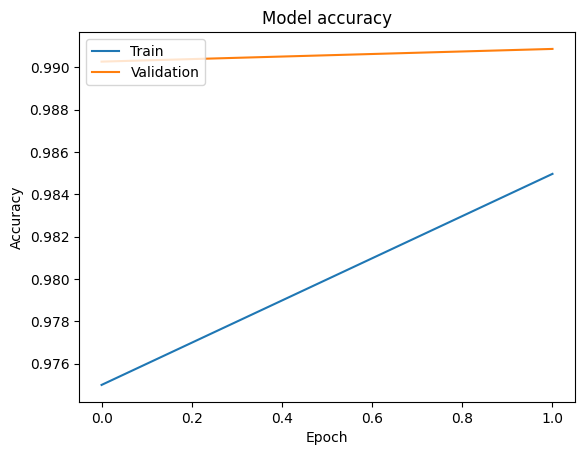

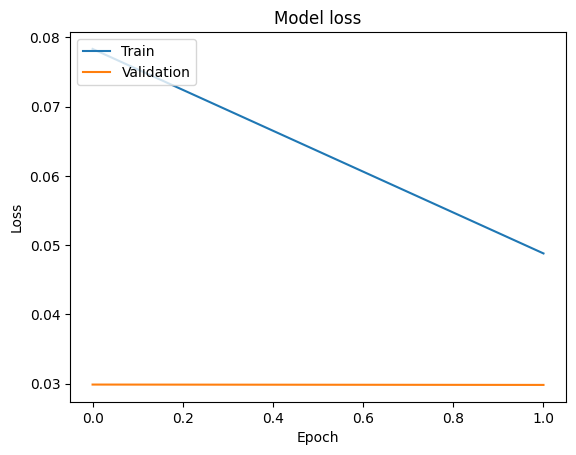

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Confusion Matrix

235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 158ms/step


<Figure size 800x800 with 0 Axes>

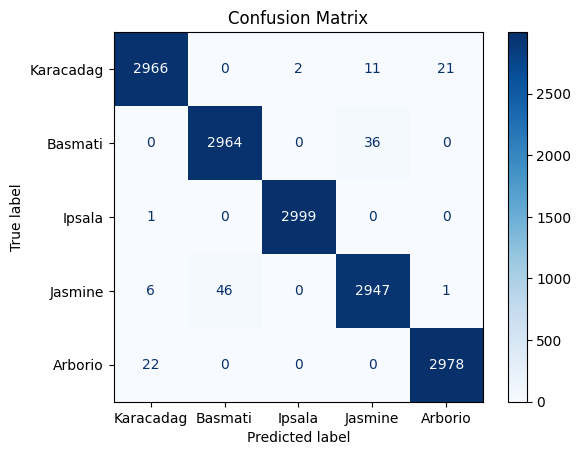

              precision    recall  f1-score   support

   Karacadag       0.99      0.99      0.99      3000
     Basmati       0.98      0.99      0.99      3000
      Ipsala       1.00      1.00      1.00      3000
     Jasmine       0.98      0.98      0.98      3000
     Arborio       0.99      0.99      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [11]:
# Ambil prediksi kelas dari model pada dataset uji
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Ambil label sebenarnya dari dataset uji
y_true = test_generator.classes

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Definisikan kelas label (misalnya: cataract, diabetic_retinopathy, glaucoma, normal)
classes = ["Karacadag", "Basmati", "Ipsala", "Jasmine", "Arborio"]

# Tampilkan confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Hitung dan tampilkan classification report (precision, recall, F1-score)
report = classification_report(y_true, y_pred, target_names=classes)
print(report)



## Konversi Model

## Inference (Optional)